# Decision Tree - Heart Disease

# Import all the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("HeartDisease.csv")
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

In [4]:
df.sample(10)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
217,63,1,0,130,330,1,0,132,1,1.8,2,3,3,0
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
191,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0


In [5]:
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

# Checking for null values

In [8]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

### There are no missing values.

In [9]:
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:xlabel='target', ylabel='count'>

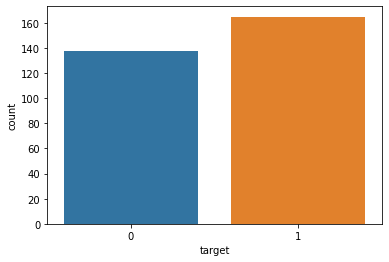

In [10]:
sns.countplot(x =df.target)

#### The dataset seems balanced.

<AxesSubplot:xlabel='gender', ylabel='count'>

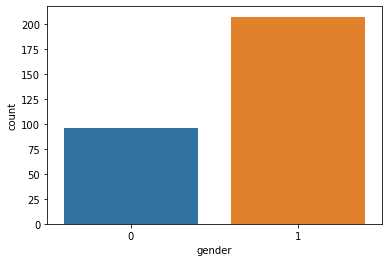

In [11]:
sns.countplot(x=df.gender) 

<AxesSubplot:xlabel='chest_pain', ylabel='count'>

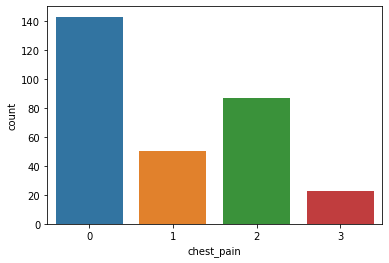

In [12]:
sns.countplot(x=df.chest_pain)

# Splitting the data

In [13]:
x=df.drop(["target"],axis=1)
y=df["target"]

In [14]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Decesion Tree Model

In [15]:
dTree=DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=3)
dTree.fit(x_train,y_train)
dTree.score(x_train,y_train)

0.8679245283018868

In [16]:
dTree.score(x_test,y_test)

0.8131868131868132

# Result

### Decision Tree Train_Score = 0.8679245283018868 
### Decision Tree Test_Score = 0.8131868131868132

#### Let's try out logistic regression.

# Logistic Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred=model.predict(x_test)

In [21]:
model.score(x_train,y_train)

0.8632075471698113

In [22]:
model.score(x_test,y_test)

0.8351648351648352

In [23]:
accuracy_score(y_test,y_pred)

0.8351648351648352

# Result

### Logistic regression train_score = 0.8632075471698113
### Logistic regression test_score = 0.8351648351648352

#### The logistic regression model performed a little better than the decision tree model.